In [2]:
import torch
import matplotlib.pyplot as plt
from common import *
import time
import copy
import gym

import xarray as xr
import numpy as np

import os
import matplotlib

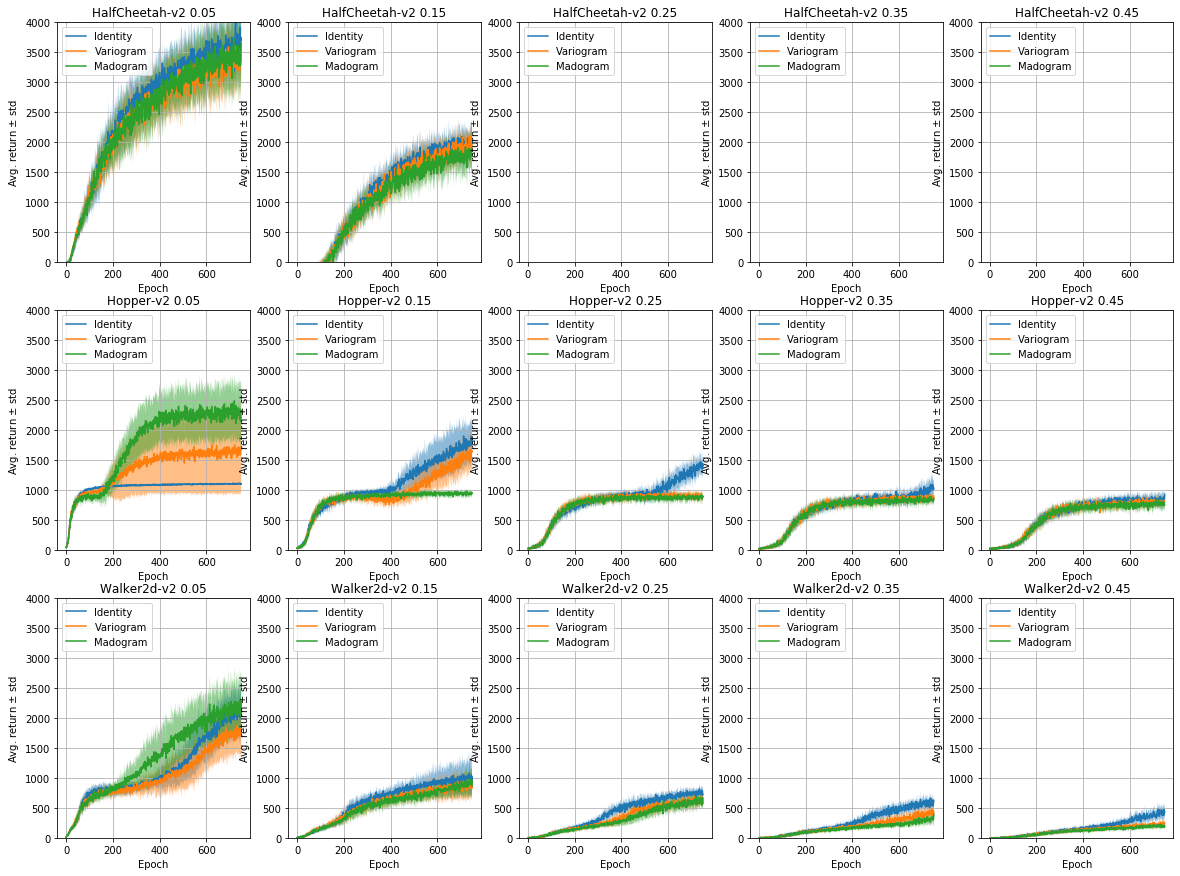

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [31]:
# matplotlib.style.use('default')

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 16}

# matplotlib.rc('font', **font)

directory = "/home/sgillen/work/lorenz/run_ars/data_hp0/"
env_names = ['HalfCheetah-v2', 'Hopper-v2', 'Walker2d-v2']

exp_list = []
for exp in os.listdir(directory):
    exp_list.append(exp)
    
exp_list.sort()

fig, axes = plt.subplots(3,5, figsize=(20,15))
for i, exp in enumerate(exp_list):
    for j, env_name in enumerate(env_names):
        data = torch.load(f"./data_hp0/{exp}/{env_name}.xr")

        policy_dict = data.policy_dict
        rews = data.rews#/data.post_rews
        exp_names = [fn.__name__ for fn in data.attrs['post_fns']]
        num_seeds = len(policy_dict[exp_names[0]])

        means = rews.mean(dim="trial")
        stds = rews.std(dim="trial")

        #plt.subplots(1,1, figsize=(10,7))
        axes[j,i].plot(means.T)
        axes[j,i].legend(['Identity', 'Variogram','Madogram'], loc='upper left')
        ci = stds

        for mean, c in zip(means, ci):
            axes[j,i].fill_between([t for t in range(len(mean))], (mean-c), (mean+c), alpha=.5)
        axes[j,i].set_title(f"{env_name} {exp}")
        axes[j,i].set_ylabel(r"Avg. return $\pm$ std")
        axes[j,i].set_xlabel(r"Epoch")
        axes[j,i].grid()
        axes[j,i].set_ylim(0, 4000)
        plt.figure()

#     for exp_name in exp_names:  
#         plt.plot(rews.loc[exp_name].T[:,0:10])
#         plt.title(exp_name)
#         plt.figure()
#     top_seeds = {'identity':[0,1], 'cdim_div':[0,1]}